#Binary Classification with CNN

##1)-Library Importing

In [1]:
# DeepLearning resources
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import models, optimizers, regularizers

# Data preprocessing and performance
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Data management resources
import numpy as np
import matplotlib.pyplot as plt


##2)-Data Importing and exploration

###2.1-Data augmentation

In [2]:
# Train Data augmentation generator
train_datagen = ImageDataGenerator(rescale=1./255,
                   rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip=True,
                   vertical_flip=True)

# Test Data augmentation generator (rescale)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/2)-Machine Learning/2)-Platzy Career (Deep Learning)/2)-Convolutional Neural Networks with TensorFlow and Keras/data/cats_and_dogs/train'
train_validation = '/content/drive/MyDrive/Colab Notebooks/2)-Machine Learning/2)-Platzy Career (Deep Learning)/2)-Convolutional Neural Networks with TensorFlow and Keras/data/cats_and_dogs/validation'

train_generator = train_datagen.flow_from_directory(train_path,
                                  target_size = (150,150),
                                  batch_size=32,
                                  class_mode='binary')

val_generator = test_datagen.flow_from_directory(train_path,
                                  target_size = (150,150),
                                  batch_size=32,
                                  class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


##3)-CNN model creation

In [4]:
# Convolution feature extraction
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Hidden layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

# Output Classification layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

###3.1-Model train

In [5]:
checkpoint = ModelCheckpoint('My_cat_dog_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True)

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [7]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                 epochs = 100,
                 validation_data = val_generator,
                 validation_steps = 10000//32,
                 callbacks = [checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.6988 - accuracy: 0.4975


Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to My_cat_dog_model.hdf5
62/62 [==============================] - 99s 1s/step - loss: 0.6988 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4985

62/62 [==============================] - 23s 375ms/step - loss: 0.6937 - accuracy: 0.4985
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5147

62/62 [==============================] - 22s 352ms/step - loss: 0.6919 - accuracy: 0.5147
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.4903

62/62 [==============================] - 21s 346ms/step - loss: 0.6943 - accuracy: 0.4903
Epoch 5/100
62/62 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5081

62/62 [==============================] - 22s 357ms/step - loss: 0.6951 - accuracy: 0.5081
Epoch 6/100
62/62 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5152

62/62 [==============================] - 22s 354ms/step - loss: 0.6926 - accuracy: 0.5152
Epoch 7/100
62/62 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.5285

62/62 [==============================] - 21s 342ms/step - loss: 0.6870 - accuracy: 0.5285
Epoch 8/100
62/62 [==============================] - ETA: 0s - loss: 0.6798 - accuracy: 0.5859

62/62 [==============================] - 21s 342ms/step - loss: 0.6798 - accuracy: 0.5859
Epoch 9/100
62/62 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.5737

62/62 [==============================] - 23s 370ms/step - loss: 0.6752 - accuracy: 0.5737
Epoch 10/100
62/62 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.5960

62/62 [==============================] - 21s 343ms/step - loss: 0.6687 - accuracy: 0.5960
Epoch 11/100
62/62 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.5650

62/62 [==============================] - 21s 345ms/step - loss: 0.6781 - accuracy: 0.5650
Epoch 12/100
62/62 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.5965

62/62 [==============================] - 21s 340ms/step - loss: 0.6654 - accuracy: 0.5965
Epoch 13/100
62/62 [==============================] - ETA: 0s - loss: 0.6676 - accuracy: 0.5981

62/62 [==============================] - 20s 326ms/step - loss: 0.6676 - accuracy: 0.5981
Epoch 14/100
62/62 [==============================] - ETA: 0s - loss: 0.6541 - accuracy: 0.6225

62/62 [==============================] - 22s 359ms/step - loss: 0.6541 - accuracy: 0.6225
Epoch 15/100
62/62 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.6499

62/62 [==============================] - 21s 336ms/step - loss: 0.6399 - accuracy: 0.6499
Epoch 16/100
62/62 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.6301

62/62 [==============================] - 23s 364ms/step - loss: 0.6543 - accuracy: 0.6301
Epoch 17/100
62/62 [==============================] - ETA: 0s - loss: 0.6495 - accuracy: 0.6260

62/62 [==============================] - 21s 339ms/step - loss: 0.6495 - accuracy: 0.6260
Epoch 18/100
62/62 [==============================] - ETA: 0s - loss: 0.6376 - accuracy: 0.6474

62/62 [==============================] - 23s 364ms/step - loss: 0.6376 - accuracy: 0.6474
Epoch 19/100
62/62 [==============================] - ETA: 0s - loss: 0.6349 - accuracy: 0.6463

62/62 [==============================] - 20s 326ms/step - loss: 0.6349 - accuracy: 0.6463
Epoch 20/100
62/62 [==============================] - ETA: 0s - loss: 0.6238 - accuracy: 0.6596

62/62 [==============================] - 21s 335ms/step - loss: 0.6238 - accuracy: 0.6596
Epoch 21/100
62/62 [==============================] - ETA: 0s - loss: 0.6089 - accuracy: 0.6667

62/62 [==============================] - 21s 341ms/step - loss: 0.6089 - accuracy: 0.6667
Epoch 22/100
62/62 [==============================] - ETA: 0s - loss: 0.6123 - accuracy: 0.6738

62/62 [==============================] - 20s 321ms/step - loss: 0.6123 - accuracy: 0.6738
Epoch 23/100
62/62 [==============================] - ETA: 0s - loss: 0.5961 - accuracy: 0.6885

62/62 [==============================] - 20s 322ms/step - loss: 0.5961 - accuracy: 0.6885
Epoch 24/100
62/62 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.6677

62/62 [==============================] - 20s 316ms/step - loss: 0.6215 - accuracy: 0.6677
Epoch 25/100
62/62 [==============================] - ETA: 0s - loss: 0.6081 - accuracy: 0.6667

62/62 [==============================] - 21s 333ms/step - loss: 0.6081 - accuracy: 0.6667
Epoch 26/100
62/62 [==============================] - ETA: 0s - loss: 0.5858 - accuracy: 0.6865

62/62 [==============================] - 19s 314ms/step - loss: 0.5858 - accuracy: 0.6865
Epoch 27/100
62/62 [==============================] - ETA: 0s - loss: 0.5998 - accuracy: 0.6845

62/62 [==============================] - 21s 334ms/step - loss: 0.5998 - accuracy: 0.6845
Epoch 28/100
62/62 [==============================] - ETA: 0s - loss: 0.5916 - accuracy: 0.6850

62/62 [==============================] - 20s 315ms/step - loss: 0.5916 - accuracy: 0.6850
Epoch 29/100
62/62 [==============================] - ETA: 0s - loss: 0.5846 - accuracy: 0.7002

62/62 [==============================] - 22s 355ms/step - loss: 0.5846 - accuracy: 0.7002
Epoch 30/100
62/62 [==============================] - ETA: 0s - loss: 0.5852 - accuracy: 0.6916

62/62 [==============================] - 21s 332ms/step - loss: 0.5852 - accuracy: 0.6916
Epoch 31/100
62/62 [==============================] - ETA: 0s - loss: 0.5806 - accuracy: 0.6951

62/62 [==============================] - 21s 335ms/step - loss: 0.5806 - accuracy: 0.6951
Epoch 32/100
62/62 [==============================] - ETA: 0s - loss: 0.5750 - accuracy: 0.7063

62/62 [==============================] - 21s 329ms/step - loss: 0.5750 - accuracy: 0.7063
Epoch 33/100
62/62 [==============================] - ETA: 0s - loss: 0.5560 - accuracy: 0.7114

62/62 [==============================] - 22s 349ms/step - loss: 0.5560 - accuracy: 0.7114
Epoch 34/100
62/62 [==============================] - ETA: 0s - loss: 0.5700 - accuracy: 0.7160

62/62 [==============================] - 20s 328ms/step - loss: 0.5700 - accuracy: 0.7160
Epoch 35/100
62/62 [==============================] - ETA: 0s - loss: 0.5664 - accuracy: 0.7099

62/62 [==============================] - 20s 315ms/step - loss: 0.5664 - accuracy: 0.7099
Epoch 36/100
62/62 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.7165

62/62 [==============================] - 22s 351ms/step - loss: 0.5556 - accuracy: 0.7165
Epoch 37/100
62/62 [==============================] - ETA: 0s - loss: 0.5564 - accuracy: 0.7251

62/62 [==============================] - 21s 342ms/step - loss: 0.5564 - accuracy: 0.7251
Epoch 38/100
62/62 [==============================] - ETA: 0s - loss: 0.5517 - accuracy: 0.7226

62/62 [==============================] - 20s 329ms/step - loss: 0.5517 - accuracy: 0.7226
Epoch 39/100
62/62 [==============================] - ETA: 0s - loss: 0.5459 - accuracy: 0.7210

62/62 [==============================] - 19s 309ms/step - loss: 0.5459 - accuracy: 0.7210
Epoch 40/100
62/62 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.7251

62/62 [==============================] - 20s 332ms/step - loss: 0.5410 - accuracy: 0.7251
Epoch 41/100
62/62 [==============================] - ETA: 0s - loss: 0.5442 - accuracy: 0.7322

62/62 [==============================] - 20s 316ms/step - loss: 0.5442 - accuracy: 0.7322
Epoch 42/100
62/62 [==============================] - ETA: 0s - loss: 0.5395 - accuracy: 0.7322

62/62 [==============================] - 21s 338ms/step - loss: 0.5395 - accuracy: 0.7322
Epoch 43/100
62/62 [==============================] - ETA: 0s - loss: 0.5326 - accuracy: 0.7409

62/62 [==============================] - 20s 322ms/step - loss: 0.5326 - accuracy: 0.7409
Epoch 44/100
62/62 [==============================] - ETA: 0s - loss: 0.5442 - accuracy: 0.7266

62/62 [==============================] - 20s 315ms/step - loss: 0.5442 - accuracy: 0.7266
Epoch 45/100
62/62 [==============================] - ETA: 0s - loss: 0.5406 - accuracy: 0.7368

62/62 [==============================] - 21s 342ms/step - loss: 0.5406 - accuracy: 0.7368
Epoch 46/100
62/62 [==============================] - ETA: 0s - loss: 0.5264 - accuracy: 0.7378

62/62 [==============================] - 19s 312ms/step - loss: 0.5264 - accuracy: 0.7378
Epoch 47/100
62/62 [==============================] - ETA: 0s - loss: 0.5173 - accuracy: 0.7591

62/62 [==============================] - 20s 319ms/step - loss: 0.5173 - accuracy: 0.7591
Epoch 48/100
62/62 [==============================] - ETA: 0s - loss: 0.5389 - accuracy: 0.7287

62/62 [==============================] - 19s 311ms/step - loss: 0.5389 - accuracy: 0.7287
Epoch 49/100
62/62 [==============================] - ETA: 0s - loss: 0.4964 - accuracy: 0.7642

62/62 [==============================] - 20s 327ms/step - loss: 0.4964 - accuracy: 0.7642
Epoch 50/100
62/62 [==============================] - ETA: 0s - loss: 0.5267 - accuracy: 0.7282

62/62 [==============================] - 19s 303ms/step - loss: 0.5267 - accuracy: 0.7282
Epoch 51/100
62/62 [==============================] - ETA: 0s - loss: 0.5109 - accuracy: 0.7470

62/62 [==============================] - 19s 312ms/step - loss: 0.5109 - accuracy: 0.7470
Epoch 52/100
62/62 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7530

62/62 [==============================] - 19s 304ms/step - loss: 0.5019 - accuracy: 0.7530
Epoch 53/100
62/62 [==============================] - ETA: 0s - loss: 0.5155 - accuracy: 0.7475

62/62 [==============================] - 20s 325ms/step - loss: 0.5155 - accuracy: 0.7475
Epoch 54/100
62/62 [==============================] - ETA: 0s - loss: 0.4788 - accuracy: 0.7693

62/62 [==============================] - 20s 317ms/step - loss: 0.4788 - accuracy: 0.7693
Epoch 55/100
62/62 [==============================] - ETA: 0s - loss: 0.4992 - accuracy: 0.7586

62/62 [==============================] - 19s 302ms/step - loss: 0.4992 - accuracy: 0.7586
Epoch 56/100
62/62 [==============================] - ETA: 0s - loss: 0.4842 - accuracy: 0.7637

62/62 [==============================] - 20s 324ms/step - loss: 0.4842 - accuracy: 0.7637
Epoch 57/100
62/62 [==============================] - ETA: 0s - loss: 0.4799 - accuracy: 0.7658

62/62 [==============================] - 19s 300ms/step - loss: 0.4799 - accuracy: 0.7658
Epoch 58/100
62/62 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.7561

62/62 [==============================] - 20s 321ms/step - loss: 0.4998 - accuracy: 0.7561
Epoch 59/100
62/62 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.7647

62/62 [==============================] - 19s 301ms/step - loss: 0.4936 - accuracy: 0.7647
Epoch 60/100
62/62 [==============================] - ETA: 0s - loss: 0.4856 - accuracy: 0.7729

62/62 [==============================] - 20s 315ms/step - loss: 0.4856 - accuracy: 0.7729
Epoch 61/100
62/62 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.7698

62/62 [==============================] - 21s 335ms/step - loss: 0.4820 - accuracy: 0.7698
Epoch 62/100
62/62 [==============================] - ETA: 0s - loss: 0.4701 - accuracy: 0.7835

62/62 [==============================] - 19s 301ms/step - loss: 0.4701 - accuracy: 0.7835
Epoch 63/100
62/62 [==============================] - ETA: 0s - loss: 0.4611 - accuracy: 0.7713

62/62 [==============================] - 20s 319ms/step - loss: 0.4611 - accuracy: 0.7713
Epoch 64/100
62/62 [==============================] - ETA: 0s - loss: 0.4848 - accuracy: 0.7673

62/62 [==============================] - 19s 300ms/step - loss: 0.4848 - accuracy: 0.7673
Epoch 65/100
62/62 [==============================] - ETA: 0s - loss: 0.4622 - accuracy: 0.7896

62/62 [==============================] - 19s 299ms/step - loss: 0.4622 - accuracy: 0.7896
Epoch 66/100
62/62 [==============================] - ETA: 0s - loss: 0.4704 - accuracy: 0.7749

62/62 [==============================] - 19s 301ms/step - loss: 0.4704 - accuracy: 0.7749
Epoch 67/100
62/62 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.7815

62/62 [==============================] - 19s 309ms/step - loss: 0.4697 - accuracy: 0.7815
Epoch 68/100
62/62 [==============================] - ETA: 0s - loss: 0.4744 - accuracy: 0.7754

62/62 [==============================] - 21s 334ms/step - loss: 0.4744 - accuracy: 0.7754
Epoch 69/100
62/62 [==============================] - ETA: 0s - loss: 0.4692 - accuracy: 0.7805

62/62 [==============================] - 19s 299ms/step - loss: 0.4692 - accuracy: 0.7805
Epoch 70/100
62/62 [==============================] - ETA: 0s - loss: 0.4681 - accuracy: 0.7777

62/62 [==============================] - 20s 323ms/step - loss: 0.4681 - accuracy: 0.7777
Epoch 71/100
62/62 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.7988

62/62 [==============================] - 19s 304ms/step - loss: 0.4614 - accuracy: 0.7988
Epoch 72/100
62/62 [==============================] - ETA: 0s - loss: 0.4543 - accuracy: 0.7957

62/62 [==============================] - 19s 313ms/step - loss: 0.4543 - accuracy: 0.7957
Epoch 73/100
62/62 [==============================] - ETA: 0s - loss: 0.4534 - accuracy: 0.7846

62/62 [==============================] - 19s 304ms/step - loss: 0.4534 - accuracy: 0.7846
Epoch 74/100
62/62 [==============================] - ETA: 0s - loss: 0.4473 - accuracy: 0.7901

62/62 [==============================] - 19s 302ms/step - loss: 0.4473 - accuracy: 0.7901
Epoch 75/100
62/62 [==============================] - ETA: 0s - loss: 0.4769 - accuracy: 0.7652

62/62 [==============================] - 21s 343ms/step - loss: 0.4769 - accuracy: 0.7652
Epoch 76/100
62/62 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.7962

62/62 [==============================] - 20s 320ms/step - loss: 0.4469 - accuracy: 0.7962
Epoch 77/100
62/62 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 0.7973

62/62 [==============================] - 19s 299ms/step - loss: 0.4438 - accuracy: 0.7973
Epoch 78/100
62/62 [==============================] - ETA: 0s - loss: 0.4530 - accuracy: 0.7881

62/62 [==============================] - 20s 321ms/step - loss: 0.4530 - accuracy: 0.7881
Epoch 79/100
62/62 [==============================] - ETA: 0s - loss: 0.4431 - accuracy: 0.7957

62/62 [==============================] - 19s 300ms/step - loss: 0.4431 - accuracy: 0.7957
Epoch 80/100
62/62 [==============================] - ETA: 0s - loss: 0.4594 - accuracy: 0.7876

62/62 [==============================] - 20s 320ms/step - loss: 0.4594 - accuracy: 0.7876
Epoch 81/100
62/62 [==============================] - ETA: 0s - loss: 0.4573 - accuracy: 0.7932

62/62 [==============================] - 19s 300ms/step - loss: 0.4573 - accuracy: 0.7932
Epoch 82/100
62/62 [==============================] - ETA: 0s - loss: 0.4423 - accuracy: 0.7907

62/62 [==============================] - 21s 340ms/step - loss: 0.4423 - accuracy: 0.7907
Epoch 83/100
62/62 [==============================] - ETA: 0s - loss: 0.4363 - accuracy: 0.7973

62/62 [==============================] - 20s 321ms/step - loss: 0.4363 - accuracy: 0.7973
Epoch 84/100
62/62 [==============================] - ETA: 0s - loss: 0.4410 - accuracy: 0.7993

62/62 [==============================] - 19s 302ms/step - loss: 0.4410 - accuracy: 0.7993
Epoch 85/100
62/62 [==============================] - ETA: 0s - loss: 0.4263 - accuracy: 0.8013

62/62 [==============================] - 19s 312ms/step - loss: 0.4263 - accuracy: 0.8013
Epoch 86/100
62/62 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.8059

62/62 [==============================] - 19s 303ms/step - loss: 0.4265 - accuracy: 0.8059
Epoch 87/100
62/62 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8008

62/62 [==============================] - 19s 301ms/step - loss: 0.4211 - accuracy: 0.8008
Epoch 88/100
62/62 [==============================] - ETA: 0s - loss: 0.4109 - accuracy: 0.8196

62/62 [==============================] - 19s 307ms/step - loss: 0.4109 - accuracy: 0.8196
Epoch 89/100
62/62 [==============================] - ETA: 0s - loss: 0.4123 - accuracy: 0.8079

62/62 [==============================] - 21s 341ms/step - loss: 0.4123 - accuracy: 0.8079
Epoch 90/100
62/62 [==============================] - ETA: 0s - loss: 0.4204 - accuracy: 0.8100

62/62 [==============================] - 19s 310ms/step - loss: 0.4204 - accuracy: 0.8100
Epoch 91/100
62/62 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.8034

62/62 [==============================] - 19s 306ms/step - loss: 0.4207 - accuracy: 0.8034
Epoch 92/100
62/62 [==============================] - ETA: 0s - loss: 0.4119 - accuracy: 0.8242

62/62 [==============================] - 20s 313ms/step - loss: 0.4119 - accuracy: 0.8242
Epoch 93/100
62/62 [==============================] - ETA: 0s - loss: 0.4186 - accuracy: 0.8105

62/62 [==============================] - 19s 303ms/step - loss: 0.4186 - accuracy: 0.8105
Epoch 94/100
62/62 [==============================] - ETA: 0s - loss: 0.3939 - accuracy: 0.8201

62/62 [==============================] - 20s 315ms/step - loss: 0.3939 - accuracy: 0.8201
Epoch 95/100
62/62 [==============================] - ETA: 0s - loss: 0.3995 - accuracy: 0.8181

62/62 [==============================] - 19s 300ms/step - loss: 0.3995 - accuracy: 0.8181
Epoch 96/100
62/62 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.8084

62/62 [==============================] - 20s 321ms/step - loss: 0.4066 - accuracy: 0.8084
Epoch 97/100
62/62 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.8298

62/62 [==============================] - 20s 329ms/step - loss: 0.4020 - accuracy: 0.8298
Epoch 98/100
62/62 [==============================] - ETA: 0s - loss: 0.3961 - accuracy: 0.8247

62/62 [==============================] - 19s 302ms/step - loss: 0.3961 - accuracy: 0.8247
Epoch 99/100
62/62 [==============================] - ETA: 0s - loss: 0.3919 - accuracy: 0.8271

62/62 [==============================] - 20s 319ms/step - loss: 0.3919 - accuracy: 0.8271
Epoch 100/100
62/62 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8288

62/62 [==============================] - 19s 299ms/step - loss: 0.3875 - accuracy: 0.8288


KeyError: ignored

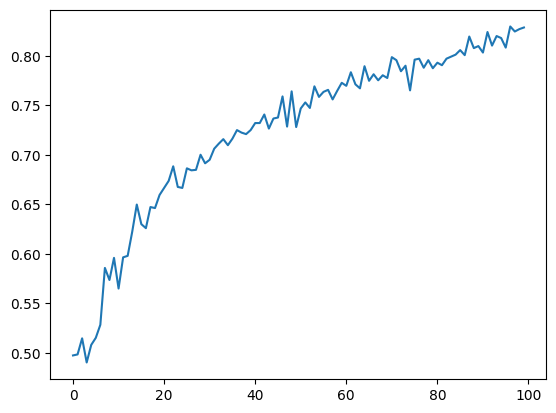

In [8]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['va_accuracy'], label='Val')
plt.legend()
plt.show()

##4)-Model evaluation

In [ ]:
test_path = '/content/drive/MyDrive/Colab Notebooks/2)-Machine Learning/2)-Platzy Career (Deep Learning)/2)-Convolutional Neural Networks with TensorFlow and Keras/data/cats_and_dogs/test'

val_generator = test_datagen.flow_from_directory(train_path,
                                  target_size = (150,150),
                                  batch_size=32,
                                  class_mode='binary')

In [ ]:
model2 = model
model2.lead_weights('./My_cat_dog_model.hdf5')
model2.evaluate(test_generator)